In [19]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def plot_distr(i, title=False, savedname=False):
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot([0, len(i)], [0.5,0.5], color='black', linewidth=0.7)
    ax.plot(i.sort_values().values)
    ax.set_xlim(0, len(i))
    if savedname:
        plt.savefig(savedname, bbox_inches='tight')
    if title:
        plt.title(title)
    plt.show()

In [21]:
df = pd.read_csv('./compiled.tsv', sep='\t', index_col=0)

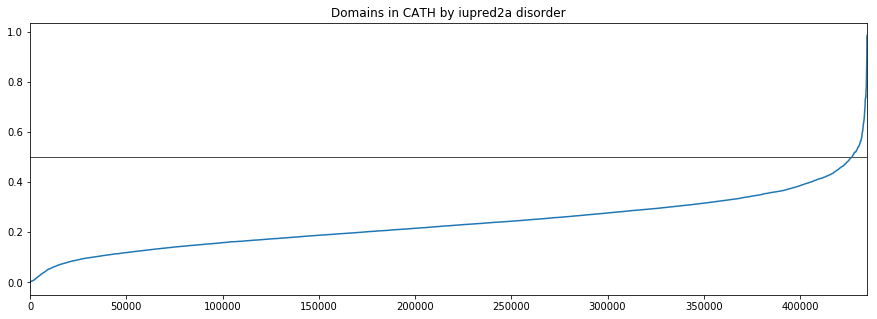

In [22]:
plot_distr(df.DIS, savedname='./figs/all_domains.png', title='Domains in CATH by iupred2a disorder')

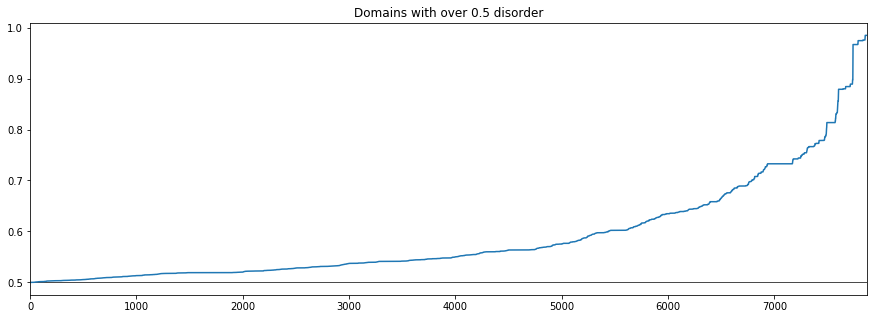

In [23]:
plot_distr(df[df['DIS']>0.5]['DIS'], savedname='./figs/over_50_domains.png', title='Domains with over 0.5 disorder')

In [24]:
over = df[df['DIS']>0.9]

In [25]:
over.SFAM.value_counts()

4.10.990.10    66
1.20.5.560     64
1.20.5.640      3
Name: SFAM, dtype: int64

In [26]:
gr = df.groupby('SFAM')

In [27]:
s = pd.Series()
for n, d in gr:
    s[n] = d.DIS.mean()

In [28]:
len(s[s>0.5])/len(s[s<0.5])*100

3.1697858708480866

3

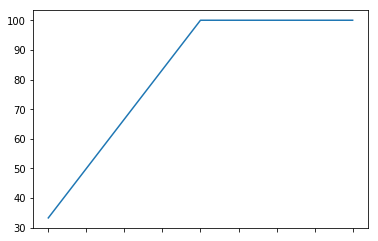

In [29]:
perc = df[df['DIS']>0.9]['SFAM'].value_counts()/df['SFAM'].value_counts()*100
perc.dropna().sort_values().plot()
len(perc.dropna())

In [30]:
perc.dropna().sort_values(ascending=False)

4.10.990.10    100.000000
1.20.5.560     100.000000
1.20.5.640      33.333333
Name: SFAM, dtype: float64

In [31]:
view = nv.show_pdbid('3pqr')
view

NGLWidget()